Data and Libraries analysis

In [3]:
# Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
#Data Analytics
file_path = "/content/nearest-earth-objects(1910-2024).csv"
df = pd.read_csv(file_path)

In [6]:
#first data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None


In [7]:
print(df.head())

    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         Fals

Data cleaning and vertification

In [10]:
# delete missing values
df_cleaned = df.dropna().reset_index(drop=True)

In [11]:
# ckeck for mossong values
print(df_cleaned.isnull().sum())

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


EDA

<ipython-input-15-79a1f6418f71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned["is_hazardous"], palette=["blue", "red"])


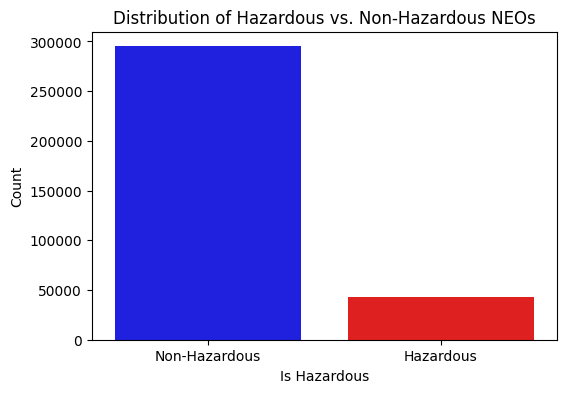

In [15]:
# Category Distribution Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned["is_hazardous"], palette=["blue", "red"])
plt.title("Distribution of Hazardous vs. Non-Hazardous NEOs")
plt.xlabel("Is Hazardous")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Hazardous", "Hazardous"])
plt.show()

<ipython-input-22-7109dc3f7219>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_hazardous", y="absolute_magnitude", data=df_cleaned, ax=axes[0, 0], palette=["blue", "red"])
<ipython-input-22-7109dc3f7219>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_hazardous", y="estimated_diameter_max", data=df_cleaned, ax=axes[0, 1], palette=["blue", "red"])
<ipython-input-22-7109dc3f7219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_hazardous", y="relative_velocity", data=df_cleaned, ax=axes[1, 0], palette=["blue", "red"])
<ip

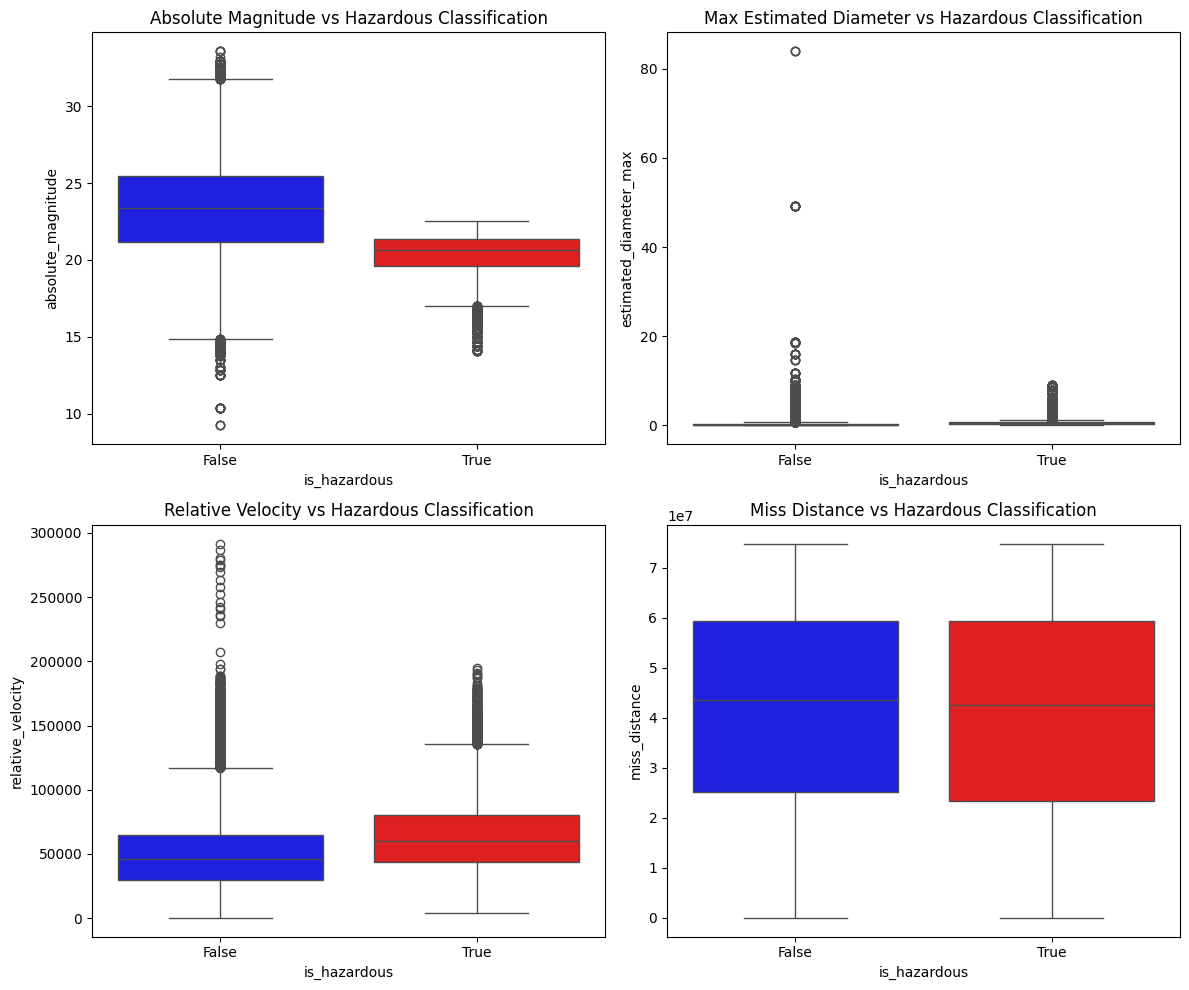

In [22]:
#Create graphs of the relationship between features and asteroid classification
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Absolute size vs severity rating
sns.boxplot(x="is_hazardous", y="absolute_magnitude", data=df_cleaned, ax=axes[0, 0], palette=["blue", "red"])
axes[0, 0].set_title("Absolute Magnitude vs Hazardous Classification")

#max diameter vs hazard rating
sns.boxplot(x="is_hazardous", y="estimated_diameter_max", data=df_cleaned, ax=axes[0, 1], palette=["blue", "red"])
axes[0, 1].set_title("Max Estimated Diameter vs Hazardous Classification")

# relative speed vs hazard rating
sns.boxplot(x="is_hazardous", y="relative_velocity", data=df_cleaned, ax=axes[1, 0], palette=["blue", "red"])
axes[1, 0].set_title("Relative Velocity vs Hazardous Classification")

#distance traveled vs hazard rating
sns.boxplot(x="is_hazardous", y="miss_distance", data=df_cleaned, ax=axes[1, 1], palette=["blue", "red"])
axes[1, 1].set_title("Miss Distance vs Hazardous Classification")

plt.tight_layout()
plt.show()


Hadling data imbalace

In [24]:
#separate categories
df_majority = df_cleaned[df_cleaned["is_hazardous"] == False]
df_minority = df_cleaned[df_cleaned["is_hazardous"] == True]

In [26]:
#Reduce the size of the larger class to make it equal to the smaller class.
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [27]:
#merge the 2 classes after pricessing
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [28]:
#Checking the distribution of categories after rebalancing
print(df_balanced["is_hazardous"].value_counts(normalize=True))

is_hazardous
False    0.5
True     0.5
Name: proportion, dtype: float64


splittig data into tranig and testing

In [30]:
# selectig impirtant features
features = ["absolute_magnitude", "estimated_diameter_max", "relative_velocity", "miss_distance"]
X_balanced = df_balanced[features]
y_balanced = df_balanced["is_hazardous"].astype(int)

In [31]:
#Split the balanced data into 80% training and 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [33]:
#check distribution after partition
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

is_hazardous
1    0.500007
0    0.499993
Name: proportion, dtype: float64
is_hazardous
0    0.500029
1    0.499971
Name: proportion, dtype: float64


Training a random foresy model to predict hazardous asteroids

In [40]:
#Create and trai a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
#predict values on the test set
y_pred = rf_model.predict(X_test)

model evaluation and results aalysis

In [43]:
#model accuracy calc
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ model accuracy: {accuracy * 100:.2f}%")

✅ model accuracy: 86.54%


In [44]:
#print performence report
print("📊 performence report:")
print(classification_report(y_test, y_pred))

📊 performence report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      8633
           1       0.82      0.94      0.87      8632

    accuracy                           0.87     17265
   macro avg       0.87      0.87      0.86     17265
weighted avg       0.87      0.87      0.86     17265



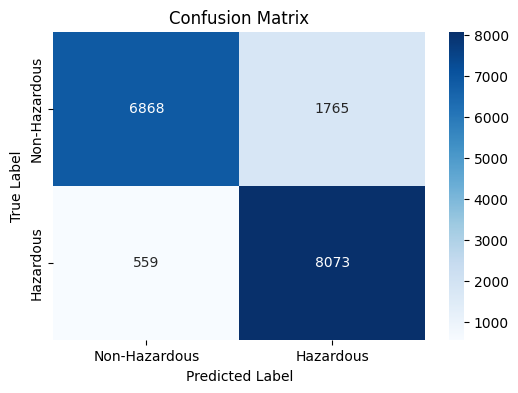

In [45]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Hazardous", "Hazardous"], yticklabels=["Non-Hazardous", "Hazardous"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()